In [186]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [187]:
df = pd.read_csv('C:\\Users\\kgsas\\OneDrive\\Desktop\\Mini_Projects\\Customer_Segmentation\\Mall_Customers.csv')

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [189]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [190]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [191]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [192]:
df['Age'].describe()

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

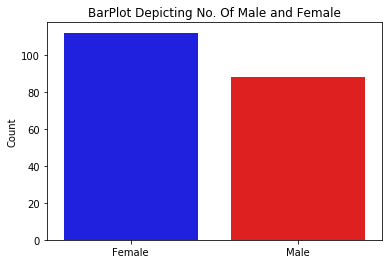

In [193]:
sns.barplot(x=df['Gender'].value_counts().index,y=df['Gender'].value_counts().values,palette = ['Blue','Red'])
plt.title('BarPlot Depicting No. Of Male and Female')
plt.ylabel('Count')
plt.show()

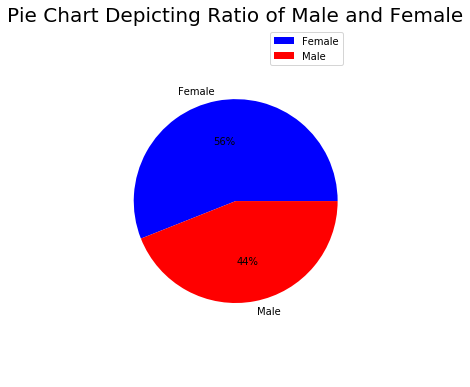

In [194]:
#visualization
labels=df['Gender'].value_counts().index
values=df['Gender'].value_counts().values
plt.figure(figsize=(5.5,5.5))
plt.pie(values,labels=labels,colors=['Blue','Red'],autopct='%1.0f%%')
plt.title('Pie Chart Depicting Ratio of Male and Female',color='black',fontsize=20)
plt.legend(['Female','Male'] , loc=1)
plt.axis('equal')
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Count')

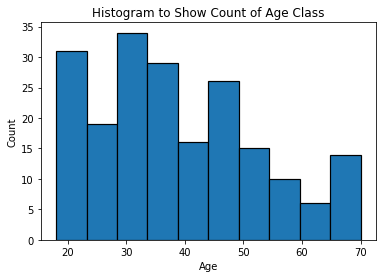

In [195]:
plt.hist(df['Age'],edgecolor='black', linewidth=1.2)
plt.title('Histogram to Show Count of Age Class')
plt.xlabel('Age')
plt.ylabel('Count')

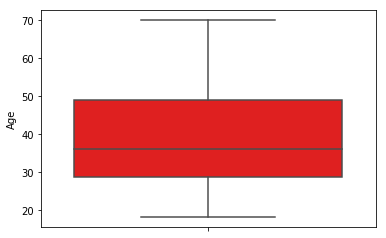

In [196]:
sns.boxplot(x = 'Age', data = df,orient='v',color='red')

Text(0, 0.5, 'Frequency')

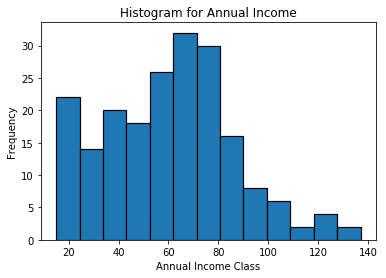

In [197]:
plt.hist(df['Annual Income (k$)'],edgecolor='black', linewidth=1.2,bins=13)
plt.title('Histogram for Annual Income')
plt.xlabel('Annual Income Class')
plt.ylabel('Frequency')

C:\Users\kgsas\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0, 0.5, 'Density'),
 Text(0.5, 0, 'Annual Income Class'),
 Text(0.5, 1.0, 'Density Plot for Annual Income')]

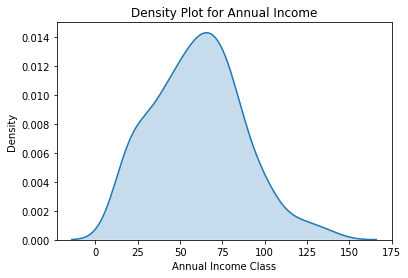

In [198]:
ax = sns.kdeplot(df['Annual Income (k$)'],shade=True,legend=False)
ax.set(xlabel='Annual Income Class', ylabel='Density',title='Density Plot for Annual Income')

[Text(0.5, 1.0, 'BoxPlot for Descriptive Analysis of Spending Score')]

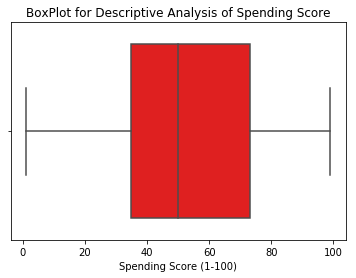

In [199]:
ax = sns.boxplot(x = 'Spending Score (1-100)', data = df,orient='h',color='red')
ax.set(title='BoxPlot for Descriptive Analysis of Spending Score')

Text(0, 0.5, 'Frequency')

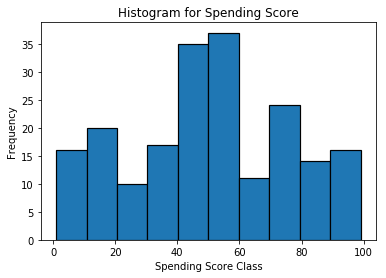

In [200]:
plt.hist(df['Spending Score (1-100)'],edgecolor='black', linewidth=1.2,bins=10)
plt.title('Histogram for Spending Score')
plt.xlabel('Spending Score Class')
plt.ylabel('Frequency')

In [201]:
df['Gender'].replace(['Female','Male'],[0,1],inplace=True)

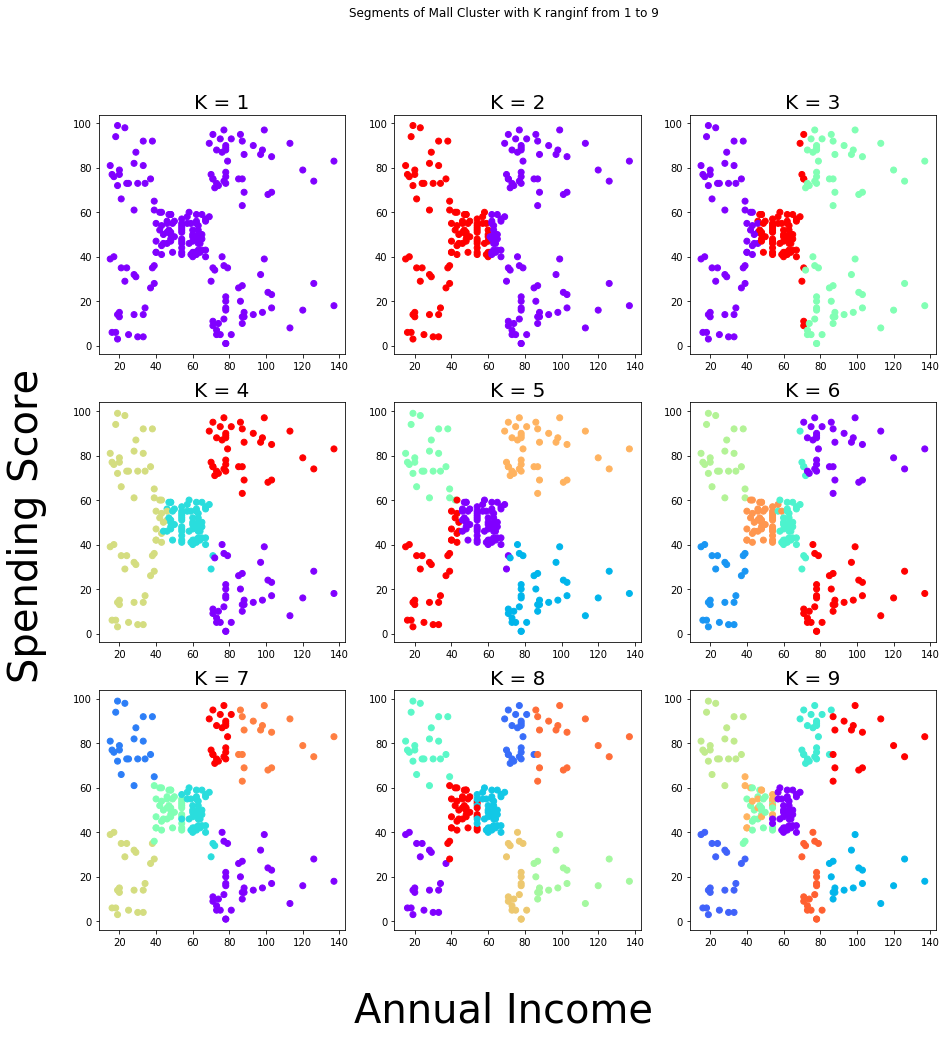

In [234]:
fig,ax = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, figsize=(15, 15))
fig.text(0.5, 0.04, 'Annual Income', ha='center',size=40)
fig.text(0.04, 0.5, 'Spending Score', va='center', rotation='vertical',size=40)
for i in range(1,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df)

    labels = kmeans.predict(df)
    centroids = kmeans.cluster_centers_
    plt.subplot(3,3,i)
    plt.title('K = {0}'.format(i),size=20)
    plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=kmeans.labels_, cmap='rainbow')
    
fig.suptitle('Segments of Mall Cluster with K ranginf from 1 to 9')
plt.show()